<a href="https://colab.research.google.com/github/EdgarData/EasyMoney/blob/Analisis-por-columnas/Tarea_1_borrador2An%C3%A1lisis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Análisis de Data easyMoney**

1. products_df
2. sociodemographic_df
3. commercial_activity_df

Se adjunta información con la descripción de los indices de cada dataset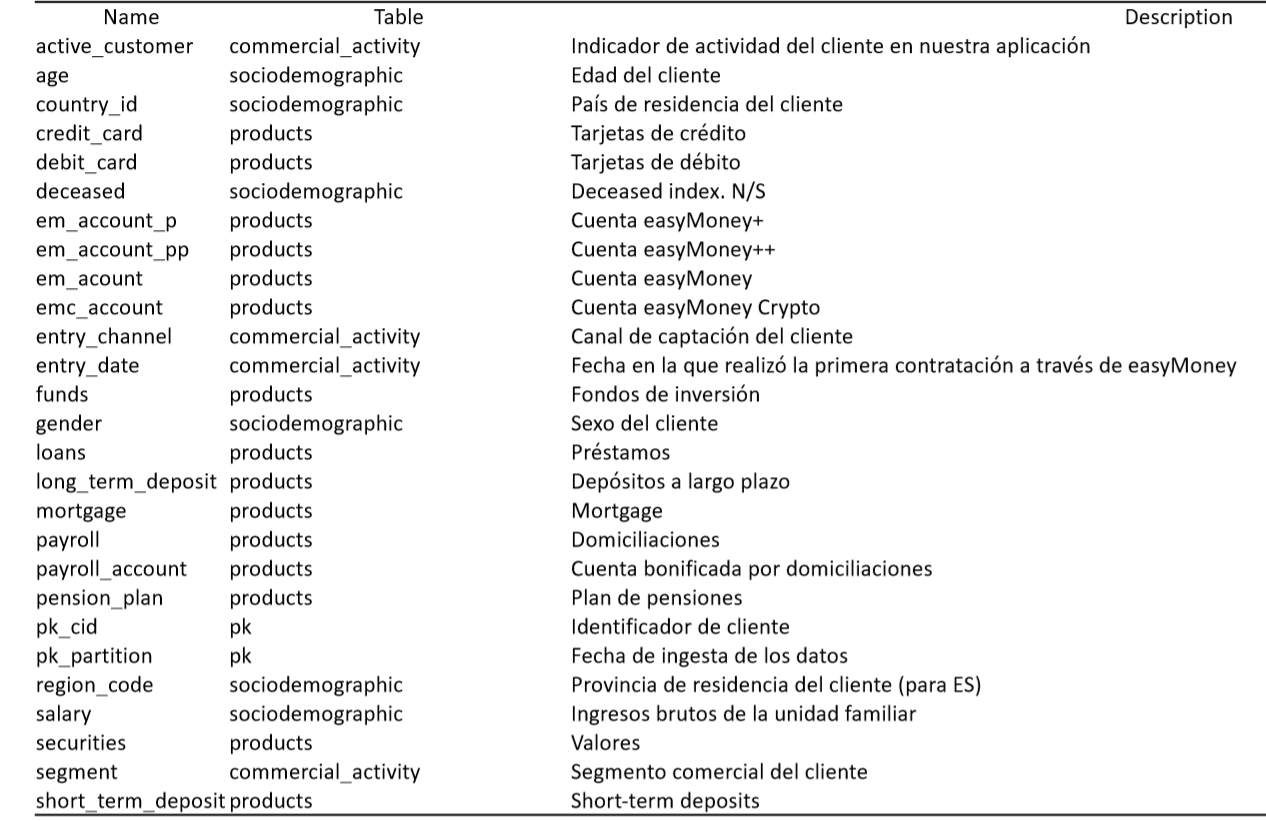

## **Librerias**

In [ ]:
!pip install cufflinks --upgrade

In [2]:
import numpy as np 
import pandas as pd

# Visualización 
import cufflinks as cf
import plotly.offline as py
import matplotlib.pyplot as plt 
import seaborn as sns 
import plotly.express as px
pd.options.display.float_format = '{:,.2f}'.format

# **1. Products**


*   **pk_cid.**          Identificador de cliente
*   **pk_partition.**      Fecha de ingesta de los datos
*   **credit_card**.        Tarjetas de crédito
*   **debit_card.**         Tarjetas de débito lista
*   **em_account_p.**       Cuenta easyMoney+
*   **em_account_pp.**      Cuenta easyMoney++
*   **em_acount.**         Cuenta easyMoney
*   **emc_account.**        Cuenta easyMoney Crypto
*   **funds.**             Fondos de inversión
*   **loans**.              Préstamos
*   **long_term_deposit.**  Depósitos a largo plazo
*   **mortgage.**           Mortgage (Hipotecas)
*  **payroll.**           Domiciliaciones
*  **payroll_account.**    Cuenta bonificada por domiciliaciones
*   **pension_plan.**      Plan de pensiones
*   **securities.**         Valores
*   **short_term_deposit.** Short-term deposits (inversión corto plazo)














In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
ruta = "/content/drive/MyDrive/clases Data/TFM/"
products = pd.read_csv(ruta+'products_df.csv')
del(products['Unnamed: 0'])

**Revisión general**

Eliminamos columnas sin valor 


In [ ]:
products.columns.to_list()

['pk_cid',
 'pk_partition',
 'short_term_deposit',
 'loans',
 'mortgage',
 'funds',
 'securities',
 'long_term_deposit',
 'em_account_pp',
 'credit_card',
 'payroll',
 'pension_plan',
 'payroll_account',
 'emc_account',
 'debit_card',
 'em_account_p',
 'em_acount']

In [ ]:
products.index.values

array([      0,       1,       2, ..., 5962921, 5962922, 5962923])

In [ ]:
products.shape

(5962924, 17)

In [ ]:
products.head().T

0           1           2           3           4
pk_cid                 1375586     1050611     1050612     1050613     1050614
pk_partition        2018-01-28  2018-01-28  2018-01-28  2018-01-28  2018-01-28
short_term_deposit           0           0           0           1           0
loans                        0           0           0           0           0
mortgage                     0           0           0           0           0
funds                        0           0           0           0           0
securities                   0           0           0           0           0
long_term_deposit            0           0           0           0           0
em_account_pp                0           0           0           0           0
credit_card                  0           0           0           0           0
payroll                   0.00        0.00        0.00        0.00        0.00
pension_plan              0.00        0.00        0.00        0.00        0.00
payroll_account              0           0           0           0           0
emc_account                  0           0           0           0           0
debit_card                   0           0           0           0           0
em_account_p                 0           0           0           0           0
em_acount                    1           1           1           0           1

In [ ]:
products.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5962924 entries, 0 to 5962923
Data columns (total 17 columns):
 #   Column              Dtype  
---  ------              -----  
 0   pk_cid              int64  
 1   pk_partition        object 
 2   short_term_deposit  int64  
 3   loans               int64  
 4   mortgage            int64  
 5   funds               int64  
 6   securities          int64  
 7   long_term_deposit   int64  
 8   em_account_pp       int64  
 9   credit_card         int64  
 10  payroll             float64
 11  pension_plan        float64
 12  payroll_account     int64  
 13  emc_account         int64  
 14  debit_card          int64  
 15  em_account_p        int64  
 16  em_acount           int64  
dtypes: float64(2), int64(14), object(1)
memory usage: 773.4+ MB


In [ ]:
products["pk_partition"] = pd.to_datetime(products["pk_partition"],format="%Y-%m-%d")
products["pk_cid"] = products.pk_cid.apply(str)

In [ ]:
products.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5962924 entries, 0 to 5962923
Data columns (total 17 columns):
 #   Column              Dtype         
---  ------              -----         
 0   pk_cid              object        
 1   pk_partition        datetime64[ns]
 2   short_term_deposit  int64         
 3   loans               int64         
 4   mortgage            int64         
 5   funds               int64         
 6   securities          int64         
 7   long_term_deposit   int64         
 8   em_account_pp       int64         
 9   credit_card         int64         
 10  payroll             float64       
 11  pension_plan        float64       
 12  payroll_account     int64         
 13  emc_account         int64         
 14  debit_card          int64         
 15  em_account_p        int64         
 16  em_acount           int64         
dtypes: datetime64[ns](1), float64(2), int64(13), object(1)
memory usage: 773.4+ MB


**Ingesta de datos por día**

In [ ]:
products_partitions = products['pk_partition'].value_counts()
products_partitions

2019-05-28    442995
2019-04-28    439627
2019-03-28    436183
2019-02-28    431727
2019-01-28    426875
2018-12-28    422481
2018-11-28    416387
2018-10-28    402300
2018-09-28    375323
2018-08-28    352922
2018-07-28    339339
2018-06-28    252104
2018-05-28    249926
2018-04-28    247463
2018-03-28    245258
2018-02-28    242521
2018-01-28    239493
Name: pk_partition, dtype: int64

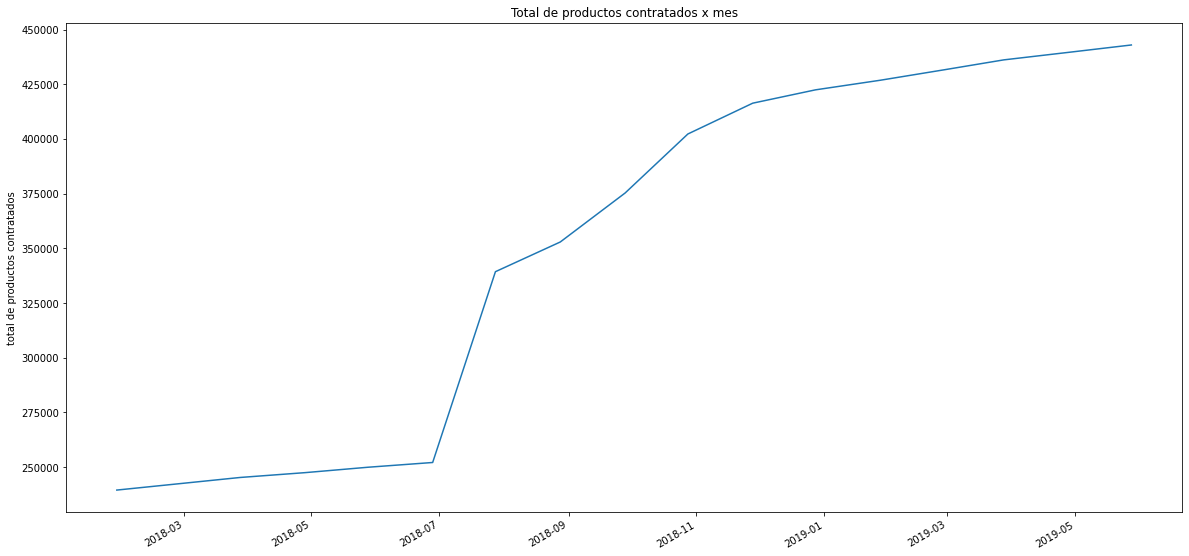

In [ ]:
products_partitions.plot(figsize=(20, 10), title="Total de productos contratados x mes", ylabel="total de productos contratados", legend=None)


In [ ]:
#proyección de clientes nuevos mes a mes, cuales se han ido, cuales no
#identificador cuales se han ido, cuales dejan de estar mes a mes, (sin productos cliente activo?) identificar productos más contratados, menos contratados, productos venta cruzada.

In [ ]:
products.describe().T

count  mean  std  min  25%  50%  75%  max
short_term_deposit 5,962,924.00  0.00 0.05 0.00 0.00 0.00 0.00 1.00
loans              5,962,924.00  0.00 0.01 0.00 0.00 0.00 0.00 1.00
mortgage           5,962,924.00  0.00 0.01 0.00 0.00 0.00 0.00 1.00
funds              5,962,924.00  0.00 0.06 0.00 0.00 0.00 0.00 1.00
securities         5,962,924.00  0.00 0.06 0.00 0.00 0.00 0.00 1.00
long_term_deposit  5,962,924.00  0.02 0.13 0.00 0.00 0.00 0.00 1.00
em_account_pp      5,962,924.00  0.00 0.00 0.00 0.00 0.00 0.00 0.00
credit_card        5,962,924.00  0.01 0.11 0.00 0.00 0.00 0.00 1.00
payroll            5,962,863.00  0.03 0.18 0.00 0.00 0.00 0.00 1.00
pension_plan       5,962,863.00  0.04 0.19 0.00 0.00 0.00 0.00 1.00
payroll_account    5,962,924.00  0.06 0.23 0.00 0.00 0.00 0.00 1.00
emc_account        5,962,924.00  0.05 0.23 0.00 0.00 0.00 0.00 1.00
debit_card         5,962,924.00  0.09 0.29 0.00 0.00 0.00 0.00 1.00
em_account_p       5,962,924.00  0.00 0.00 0.00 0.00 0.00 0.00 1.00
em_acount          5,962,924.00  0.73 0.44 0.00 0.00 1.00 1.00 1.00

In [ ]:
products.groupby("pk_cid").nunique()

pk_partition  short_term_deposit  ...  em_account_p  em_acount
pk_cid                                     ...                         
1000028            17                   1  ...             1          2
1000096            17                   1  ...             1          1
1000105             9                   1  ...             1          1
1000113            14                   1  ...             1          2
1000130            11                   1  ...             1          1
...               ...                 ...  ...           ...        ...
998859             17                   1  ...             1          1
999706              6                   1  ...             1          1
999825             17                   1  ...             1          1
999835             17                   2  ...             1          2
999892             17                   1  ...             1          1

[456373 rows x 16 columns]

In [ ]:
# de momento sabemos que existen 456373 clientes únicos en la base de datos en los 17 periodos.
products["pk_cid"].nunique()

456373

In [ ]:
#Hemos comprobado que no hay clientes repetidos en un mismo mes
products[products['pk_partition'] == '2019-05-28']['pk_cid'].nunique() #como verlo a mayor escala mejorar esto

442995

In [ ]:
#Comprobadísimo que el ID del cliente, solo aparece una vez por periodo.
products['pk_cid'][products['pk_partition'] == "2019-05-28"].value_counts().sample(20)

1261838    1
1046922    1
1406836    1
1156092    1
1173651    1
1107107    1
1397250    1
1169051    1
1039995    1
1389166    1
1016565    1
1294648    1
1050712    1
1098251    1
1329872    1
1248150    1
1254547    1
1008399    1
1509204    1
1038208    1
Name: pk_cid, dtype: int64

In [ ]:
products[products["pk_cid"] == "999706"].value_counts()

pk_cid  pk_partition  short_term_deposit  loans  mortgage  funds  securities  long_term_deposit  em_account_pp  credit_card  payroll  pension_plan  payroll_account  emc_account  debit_card  em_account_p  em_acount
999706  2019-05-28    0                   0      0         0      0           0                  0              0            0.00     0.00          0                0            0           0             0            1
        2019-04-28    0                   0      0         0      0           0                  0              0            0.00     0.00          0                0            0           0             0            1
        2019-03-28    0                   0      0         0      0           0                  0              0            0.00     0.00          0                0            0           0             0            1
        2019-02-28    0                   0      0         0      0           0                  0              0            0.00

In [ ]:
products_sorted = products.sort_values(by=['pk_cid', 'pk_partition'])
products_sorted

pk_cid pk_partition  ...  em_account_p  em_acount
83145    1000028   2018-01-28  ...             0          1
398328   1000028   2018-02-28  ...             0          1
648478   1000028   2018-03-28  ...             0          1
895292   1000028   2018-04-28  ...             0          1
1055025  1000028   2018-05-28  ...             0          1
...          ...          ...  ...           ...        ...
4150681   999892   2019-01-28  ...             0          1
4534978   999892   2019-02-28  ...             0          1
5003358   999892   2019-03-28  ...             0          1
5287361   999892   2019-04-28  ...             0          1
5815791   999892   2019-05-28  ...             0          1

[5962924 rows x 17 columns]

In [ ]:
products_total = products.groupby('pk_partition').sum() #cada mes nos muestra nuevas o no? ??
products_total

short_term_deposit  loans  ...  em_account_p  em_acount
pk_partition                             ...                         
2018-01-28                   883     19  ...             2     215293
2018-02-28                  1343     19  ...             2     217098
2018-03-28                  1664     23  ...             2     218683
2018-04-28                  1740     24  ...             2     219816
2018-05-28                  1455     27  ...             2     221291
2018-06-28                  1244     27  ...             2     224328
2018-07-28                  1282     28  ...             2     234324
2018-08-28                  1335     29  ...             2     245980
2018-09-28                  1386     31  ...             2     261210
2018-10-28                  1374     33  ...             2     277707
2018-11-28                  1018     32  ...             2     284900
2018-12-28                   528     30  ...             2     288928
2019-01-28                   125     28  ...             2     291786
2019-02-28                    11     29  ...             2     292988
2019-03-28                     2     29  ...             2     295046
2019-04-28                     2     30  ...             2     295844
2019-05-28                     2     30  ...             2     296380

[17 rows x 15 columns]

In [ ]:
py.iplot([{
    "x":products_total.index,
    "y": products_total[col],
    "name": col
}   for col in products_total.columns], filename= "cufflinks/multiple-lines-on-same-chart")

**Valores Nulos**

In [ ]:
products.isnull().any()

pk_cid                False
pk_partition          False
short_term_deposit    False
loans                 False
mortgage              False
funds                 False
securities            False
long_term_deposit     False
em_account_pp         False
credit_card           False
payroll                True
pension_plan           True
payroll_account       False
emc_account           False
debit_card            False
em_account_p          False
em_acount             False
dtype: bool

In [ ]:
products.isna().sum()

pk_cid                 0
pk_partition           0
short_term_deposit     0
loans                  0
mortgage               0
funds                  0
securities             0
long_term_deposit      0
em_account_pp          0
credit_card            0
payroll               61
pension_plan          61
payroll_account        0
emc_account            0
debit_card             0
em_account_p           0
em_acount              0
dtype: int64

In [ ]:
payroll_null = products.payroll.isna()
pension_plan_null = products.pension_plan.isna()
products_null = products.loc[payroll_null | pension_plan_null]
  #(elminarlos o sustituir)

In [ ]:
products_null.head(20).T

20679   ...               274021
pk_cid                          1023793  ...              1221067
pk_partition        2018-01-28 00:00:00  ...  2018-02-28 00:00:00
short_term_deposit                    0  ...                    0
loans                                 0  ...                    0
mortgage                              0  ...                    0
funds                                 0  ...                    0
securities                            0  ...                    0
long_term_deposit                     0  ...                    0
em_account_pp                         0  ...                    0
credit_card                           0  ...                    0
payroll                             NaN  ...                  NaN
pension_plan                        NaN  ...                  NaN
payroll_account                       0  ...                    0
emc_account                           0  ...                    0
debit_card                            0  ...                    0
em_account_p                          0  ...                    0
em_acount                             0  ...                    0

[17 rows x 20 columns]

In [ ]:
products_null[products_null["pk_cid"].duplicated()]

pk_cid pk_partition  ...  em_account_p  em_acount
274021   1221067   2018-02-28  ...             0          0
366925   1266281   2018-02-28  ...             0          0
486224   1221067   2018-03-28  ...             0          0
513329   1266833   2018-03-28  ...             0          0
738304   1221067   2018-04-28  ...             0          0
1015545  1115187   2018-05-28  ...             0          0
1213934  1221067   2018-05-28  ...             0          0

[7 rows x 17 columns]

In [ ]:
products_null['pk_cid'].unique().shape

(54,)

In [ ]:
products[products["pk_cid"] == "1213934"].value_counts()  #no sabemos por que son nulos, hay nulos con mas productos contratados

pk_cid   pk_partition  short_term_deposit  loans  mortgage  funds  securities  long_term_deposit  em_account_pp  credit_card  payroll  pension_plan  payroll_account  emc_account  debit_card  em_account_p  em_acount
1213934  2019-05-28    0                   0      0         0      0           0                  0              0            0.00     0.00          0                0            0           0             1            1
         2018-08-28    0                   0      0         0      0           0                  0              0            0.00     0.00          0                0            0           0             1            1
         2018-02-28    0                   0      0         0      0           0                  0              0            0.00     0.00          0                0            0           0             1            1
         2018-03-28    0                   0      0         0      0           0                  0              0           

In [ ]:
#identificar clientes sin productos 

**2. Sociodemographic**


*   **pk_cid.** Identificador de cliente
*   **pk_partition.** Fecha de ingesta de los datos
*   **age.** Edad del cliente
*   **country_id.** País de residencia del cliente
*   **deceased.** Deceased index. N/S
*   **gender.** Sexo del cliente
*   **region_code.** Provincia de residencia del cliente (para ES)
*   **salary.** Ingresos brutos de la unidad familiar


In [ ]:
sociodemographic = pd.read_csv(ruta+'sociodemographic_df.csv')
del(sociodemographic['Unnamed: 0'])

In [ ]:
sociodemographic['pk_cid'] = sociodemographic.pk_cid.apply(str)
sociodemographic['pk_partition'] = pd.to_datetime(sociodemographic["pk_partition"], format="%Y-%m-%d")  
sociodemographic['region_code'] = sociodemographic.region_code.apply(str)

In [ ]:
sociodemographic.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5962924 entries, 0 to 5962923
Data columns (total 8 columns):
 #   Column        Dtype         
---  ------        -----         
 0   pk_cid        object        
 1   pk_partition  datetime64[ns]
 2   country_id    object        
 3   region_code   object        
 4   gender        object        
 5   age           int64         
 6   deceased      object        
 7   salary        float64       
dtypes: datetime64[ns](1), float64(1), int64(1), object(5)
memory usage: 363.9+ MB


In [ ]:
sociodemographic.head(10)

pk_cid pk_partition country_id region_code gender  age deceased     salary
0  1375586   2018-01-28         ES        29.0      H   35        N  87,218.10
1  1050611   2018-01-28         ES        13.0      V   23        N  35,548.74
2  1050612   2018-01-28         ES        13.0      V   23        N 122,179.11
3  1050613   2018-01-28         ES        50.0      H   22        N 119,775.54
4  1050614   2018-01-28         ES        50.0      V   23        N        nan
5  1050615   2018-01-28         ES        45.0      H   23        N  22,220.04
6  1050616   2018-01-28         ES        24.0      H   23        N 295,590.36
7  1050617   2018-01-28         ES        50.0      H   23        N 113,316.66
8  1050619   2018-01-28         ES        20.0      H   24        N        nan
9  1050620   2018-01-28         ES        10.0      H   23        N 113,194.98

In [ ]:
sociodemographic.shape

(5962924, 8)

**Valores Nulos**

In [ ]:
sociodemographic.isnull().any()

pk_cid          False
pk_partition    False
country_id      False
region_code     False
gender           True
age             False
deceased        False
salary           True
dtype: bool

In [ ]:
sociodemographic.isna().sum()

pk_cid                0
pk_partition          0
country_id            0
region_code           0
gender               25
age                   0
deceased              0
salary          1512103
dtype: int64

In [ ]:
sociodemographic.isnull().mean()*100

pk_cid          0.00
pk_partition    0.00
country_id      0.00
region_code     0.00
gender          0.00
age             0.00
deceased        0.00
salary         25.36
dtype: float64

**Análisis de Columnas**

In [ ]:
sociodemographic.country_id.value_counts(dropna=False)

ES    5960672
GB        441
FR        225
DE        199
US        195
CH        194
BR         87
BE         81
VE         79
IE         68
MX         58
AR         51
AT         51
PL         49
IT         45
MA         34
CL         30
CN         28
CA         22
GA         17
CM         17
RU         17
MR         17
DO         17
LU         17
GT         17
QA         17
SA         17
SN         17
ET         17
CI         17
NO         17
CO         17
SE         16
JM         11
PT         11
DJ         11
RO          9
HU          8
DZ          7
PE          4
Name: country_id, dtype: int64

In [ ]:
sociodemographic.region_code.value_counts(dropna=False)

28.0    1185757
8.0      600362
46.0     358142
30.0     296856
41.0     290447
15.0     254891
29.0     187911
36.0     175850
3.0      171358
11.0     160894
33.0     134562
50.0     132983
6.0      122587
35.0     121982
47.0     116948
18.0     102789
45.0     102328
37.0      92538
10.0      83283
14.0      75405
2.0       72071
21.0      72037
13.0      70092
39.0      69589
12.0      68709
7.0       62436
32.0      54639
27.0      52783
43.0      51782
17.0      50749
9.0       47746
25.0      46887
16.0      36094
24.0      35426
48.0      35256
26.0      34790
4.0       32680
31.0      31241
49.0      30965
23.0      30955
38.0      29001
34.0      27545
19.0      26762
40.0      21658
5.0       21300
22.0      21112
20.0      18833
1.0       12999
44.0      12616
42.0       8500
51.0       2896
52.0       2638
nan        2264
Name: region_code, dtype: int64

In [ ]:
sociodemographic[sociodemographic.region_code.isnull.()] #ver nulos de esta variable

SyntaxError: ignored

In [ ]:
sociodemographic.gender.value_counts(dropna=False)

H      3087502
V      2875397
NaN         25
Name: gender, dtype: int64

In [ ]:
# nueva categoría genero? campaña marketing segm
#investigar

In [ ]:
sociodemographic.salary.value_counts(dropna=False)

nan           1512103
451,931.22        760
288,997.44        546
135,522.15        466
128,318.52        458
               ...   
192,297.42          1
55,041.57           1
150,955.83          1
51,838.86           1
73,880.40           1
Name: salary, Length: 258630, dtype: int64

In [ ]:
#modelo de predicción para saber salary de clientes nulos? no tener en cuenta 

**3. Commercial Activity**

*   **pk_cid.** Identificador de cliente
*   **pk_partition.** Fecha de ingesta de los datos
*   **active_customer.** Indicador actividad del cliente en nuestra APP 
*   **entry_channel.** Canal de captación del cliente
*   **entry_date.** Fecha primera contratación a través de easyMoney
*   **segment.** Segmento comercial del cliente





In [ ]:
commercial = pd.read_csv(ruta+'commercial_activity_df.csv')
del(commercial['Unnamed: 0'])

In [ ]:
commercial['pk_cid'] = commercial.pk_cid.apply(str)
commercial['pk_partition'] = pd.to_datetime(commercial["pk_partition"],  format="%Y-%m-%d")
commercial['entry_date'] = pd.to_datetime(commercial["entry_date"], format="%Y-%m-%d")

ValueError: ignored

In [ ]:
#2015-02-29 convertirlo cambiarlo

In [ ]:
commercial.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5962924 entries, 0 to 5962923
Data columns (total 6 columns):
 #   Column           Dtype         
---  ------           -----         
 0   pk_cid           object        
 1   pk_partition     datetime64[ns]
 2   entry_date       object        
 3   entry_channel    object        
 4   active_customer  float64       
 5   segment          object        
dtypes: datetime64[ns](1), float64(1), object(4)
memory usage: 273.0+ MB


In [ ]:
commercial.head()

pk_cid pk_partition  ... active_customer             segment
0  1375586   2018-01-28  ...            1.00   02 - PARTICULARES
1  1050611   2018-01-28  ...            0.00  03 - UNIVERSITARIO
2  1050612   2018-01-28  ...            0.00  03 - UNIVERSITARIO
3  1050613   2018-01-28  ...            0.00  03 - UNIVERSITARIO
4  1050614   2018-01-28  ...            1.00  03 - UNIVERSITARIO

[5 rows x 6 columns]

In [ ]:
commercial.describe().T

count  mean  std  min  25%  50%  75%  max
active_customer 5,962,924.00  0.40 0.49 0.00 0.00 0.00 1.00 1.00

**Análisis de Columnas**

In [ ]:
commercial.entry_date.value_counts(dropna=False)

2017-07-28    57389
2017-10-03    54287
2017-08-04    45746
2016-10-14    40804
2016-08-03    33414
              ...  
2016-09-07       11
2015-08-11       11
2017-03-16       11
2018-05-31        9
2017-05-01        7
Name: entry_date, Length: 1499, dtype: int64

In [ ]:
commercial.entry_channel.value_counts(dropna=False)

KHE    3113947
KFC     890620
KHQ     590280
KAT     416084
KHK     230197
        ...   
KEJ          8
KHS          5
KFP          2
KDA          2
KDS          1
Name: entry_channel, Length: 69, dtype: int64

In [ ]:
commercial.active_customer.value_counts(dropna=False)

0.00    3557573
1.00    2405351
Name: active_customer, dtype: int64

In [ ]:
#cruzar tabla de clientes identificar que es esto (0-1)'

In [ ]:
commercial.segment.value_counts(dropna=False)

03 - UNIVERSITARIO    3900166
02 - PARTICULARES     1830875
NaN                    133944
01 - TOP                97939
Name: segment, dtype: int64

In [ ]:
#tiene sentido?

In [ ]:
commercial["segment"] = commercial.segment.str.strip().value_counts()

In [ ]:
commercial.segment.value_counts(dropna=False)

nan    5962924
Name: segment, dtype: int64

In [ ]:
commercial.segment

0         nan
1         nan
2         nan
3         nan
4         nan
           ..
5962919   nan
5962920   nan
5962921   nan
5962922   nan
5962923   nan
Name: segment, Length: 5962924, dtype: float64

**Valores Nulos**

In [ ]:
commercial.isnull().any()

pk_cid             False
pk_partition       False
entry_date         False
entry_channel       True
active_customer    False
segment             True
dtype: bool

In [ ]:
commercial.isna().sum()

pk_cid                   0
pk_partition             0
entry_date               0
entry_channel       133033
active_customer          0
segment            5962924
dtype: int64

In [ ]:
commercial.isnull().mean()*100

pk_cid              0.00
pk_partition        0.00
entry_date          0.00
entry_channel       2.23
active_customer     0.00
segment           100.00
dtype: float64